### News

In [7]:
!which python

/home/tomorrow/primera_folder/pretrain/bin/python


In [1]:
import json
import os
import pyarrow.parquet as pq
import pyarrow as pa
import pandas as pd
from tqdm import tqdm
from multiprocessing import Pool

In [2]:
# Load the schema from the Parquet file
folder_name = [i for i in os.listdir("/home/tomorrow/primera_folder/data/baomoi/news_data/") if i.startswith("baomoi2")]
print(folder_name)
parquet_file = '/home/tomorrow/primera_folder/data/baomoi/news_data/baomoi2_00000.parquet'
schema = pq.read_schema(parquet_file)

# Print the schema to understand the data types
print(schema)

['baomoi2_00014.parquet', 'baomoi2_00002.parquet', 'baomoi2_00005.parquet', 'baomoi2_00021.parquet', 'baomoi2_00012.parquet', 'baomoi2_00019.parquet', 'baomoi2_00022.parquet', 'baomoi2_00011.parquet', 'baomoi2_00020.parquet', 'baomoi2_00016.parquet', 'baomoi2_00001.parquet', 'baomoi2_00023.parquet', 'baomoi2_00015.parquet', 'baomoi2_00018.parquet', 'baomoi2_00000.parquet', 'baomoi2_00013.parquet', 'baomoi2_00006.parquet', 'baomoi2_00010.parquet', 'baomoi2_00007.parquet', 'baomoi2_00004.parquet', 'baomoi2_00003.parquet', 'baomoi2_00017.parquet', 'baomoi2_00008.parquet', 'baomoi2_00009.parquet']
body: string
cates: list<element: string>
  child 0, element: string
id: int64
keywords: list<element: string>
  child 0, element: string
link: string
publish: struct<$date: string>
  child 0, $date: string
sapo: string
source: string
title: string
tags: list<element: string>
  child 0, element: string
crawled: bool
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null,

In [3]:
import re
from datetime import datetime, timedelta

def convert_date(date_str):
    # Use regular expression to extract date and time components
    match = re.match(r'(\d{4}-\d{2}-\d{2})T(\d{2}:\d{2}):\d{2}\.\d{3}Z', date_str)
    if not match:
        return None

    # Extract date and time
    date_part, time_part = match.groups()

    # Convert to datetime object
    dt = datetime.strptime(date_part + ' ' + time_part, '%Y-%m-%d %H:%M')

    # Adjust for timezone if necessary (example: add 16 hours)
    # Adjust this timedelta according to your timezone difference from UTC
    dt += timedelta(hours=16)

    # Return the formatted date-time string
    return dt.strftime('%Y-%m-%d %H:%M:%S')

# Example usage
# date_str = "2023-10-16T05:21:00.000Z"
# converted_date = convert_date(date_str)
# print(converted_date)
# convert_date(list(publish)[0]['$date'])

In [4]:
parquet_file = '/home/tomorrow/primera_folder/data/baomoi/news_data/baomoi2_00000.parquet'
concatenated_table = pq.read_table(parquet_file)

In [5]:
title = concatenated_table.column('title').to_pandas()
data_publish = [convert_date(i['$date']) for i in concatenated_table.column('publish').to_pandas()]
sapo = concatenated_table.column('sapo').to_pandas()
cate= [list(i) for i in list(concatenated_table.column('cates').to_pandas())]
keywords= concatenated_table.column('keywords').to_pandas()
tags= concatenated_table.column('tags').to_pandas()
body= concatenated_table.column('body').to_pandas()

In [6]:
import trafilatura
title[0],sapo[0],cate[0],keywords[0],trafilatura.extract(body[0]),data_publish[0]

('Phương tiện hỗn loạn, vượt biển cấm trong ngày đầu không cho xe từ Vành đai 3 vào phố Bằng Liệt',
 'Cuối tuần qua Sở GTVT Hà Nội thực hiện phương án cấm xe từ đường Vành đai 3 vào phố Bằng Liệt (khu Linh Đàm) và ngược lại để triển khai dự án xử lý nước thải Yên Xá. Sáng 16/10 (thứ Hai) là ngày đầu lượng xe lưu thông đông phải đối diện với phương án phân luồng này.',
 ['Xã hội', 'Giao thông'],
 array(['Hà Nội', 'Phố Bằng Liệt', 'Vành đai 3', 'Yên Xá',
        'cầu Bắc Linh Đàm', 'Nghiêm Xuân Yêm', 'Bằng Liệt', 'Khu Linh Đàm',
        'phố Linh Đàm', 'Sở GTVT Hà Nội', 'vượt biển'], dtype=object),
 'Sáng nay (16/10) toàn bộ xe từ hướng Thanh Xuân sang hướng KĐT Linh Đàm bị cấm vào phố Bằng Liệt.\nCùng với đó, xe đi từ KĐT Linh Đàm ra phố Nghiêm Xuân Yêm (Vành đai 3) cũng bị cấm và phân luồng đi theo hướng khác.\nVành đai 3 qua cầu Dậu có một nhánh đường bên phải để rẽ vào phố Bằng Liệt (bờ sông) đến KĐT Linh Đàm, tuy nhiên do nhánh đường này bị cấm nên sáng 16/10 toàn bộ xe qua cầu đổ h

### Vnexpress

In [1]:
from datasets import load_dataset
vn = load_dataset("bkai-foundation-models/ViClusterData")

/home/tomorrow/primera_folder/pretrain/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset parquet (/home/tomorrow/.cache/huggingface/datasets/bkai-foundation-models___parquet/bkai-foundation-models--ViClusterData-241b2bea60e47f90/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 1/1 [00:00<00:00, 97.03it/s]


In [2]:
vn=vn['train']

### Search / Crawling

In [52]:
new_vn=[
    {'id': vn[i]['id'],
    'title': vn[i]['title'],
    'sapo': vn[i]['sapo'],
    'content': vn[i]['content']
    }
    for i in range(7500,7500+2500) 
    if vn[i]['title'] and vn[i]['sapo']
]


In [1]:
with open("/home/tomorrow/primera_folder/search-customer/src/50serper.txt",'r') as file:
    txt=file.read()
all_key= [i.split(" ")[-1].strip() for i in txt.split('\n')]
# all_key=["6bedf5148e400cf299291111562cd01d2e98f46f"]
len(all_key),all_key[1:2]

(25, ['1f88731f9eee10d5de48d30b8d30dc921ce729d2'])

In [3]:
import random
import requests
import json
import time 

class SerperSearch:
  def __init__(self,api_key = all_key[1:2]):
    self.api_key = api_key
    self.url = "https://google.serper.dev/search"

  def search(self, query, gl="vn", hl="vi", page=0, num=10):
    payload = json.dumps({
      "q": query,
      "gl": gl,
      "hl": hl,
      "page": page,
      "num": num
    })
    headers = {
      'X-API-KEY': random.choice(self.api_key),
      'Content-Type': 'application/json'
    }

    start_time = time.time()
    response = requests.request("POST", self.url, headers=headers, data=payload)
    return response.json()['organic']

  def save_results(self, results, file_path):
    with open(file_path, 'w', encoding='utf8') as fl:
      fl.write(json.dumps(results, indent=4, ensure_ascii=False))
      fl.write('\n')
search= SerperSearch()

### Multi processing search

In [56]:
def extract_text(temp):
    # Assuming `search` is defined elsewhere
    temp['related_search'] = search.search(temp['sapo'])
    return temp

def process_item(temp):
    return extract_text(temp)
# extract_text(vn[0])

In [57]:
from tqdm import tqdm
from multiprocessing import Pool

if __name__ == "__main__":
    # Number of processes to use
    num_processes = 24  # You can adjust this number as needed

    # Create a multiprocessing Pool
    with Pool(num_processes) as pool:
        # Use tqdm for progress bar
        results = list(tqdm(pool.imap(process_item, new_vn), total=len(new_vn)))

    # Now `results` contains the processed items

100%|██████████| 2500/2500 [02:04<00:00, 20.13it/s]


In [ ]:
### for baomoi
# res=[]
# for id in tqdm(range(len(title[:10]))):
#     res.append(
#         {
#             'title': title[id],
#             'sapo': sapo[id],
#             'date': data_publish[id],
#             'cate': cate[id],
#             'body': trafilatura.extract(body[id]),
#             'search_results': search.search(title[id])
#         }
#     )
# with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples.json",'w',encoding='utf8') as f:
#     json.dump(res,f,ensure_ascii=False,indent=4)

In [58]:
len(sapo+results)

9998

In [59]:
# with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples_sapo.json",'w',encoding='utf8') as f:
#     json.dump(sapo+results,f,ensure_ascii=False,indent=4)

In [6]:
with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples_title.json",'r',encoding='utf8') as f:
    title= json.load(f)
len(title)
# with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples_sapo.json",'r',encoding='utf8') as f:
#     sapo= json.load(f)

22496

### Extract text

In [1]:
import trafilatura
import json
from newsplease import NewsPlease
from tqdm import tqdm

In [91]:
with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples_title.json",'r',encoding='utf8') as f:
    title= json.load(f)
# with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples_sapo.json",'r',encoding='utf8') as f:
#     sapo= json.load(f)

In [94]:
all_search_title= [i['title'] for i in title]

In [97]:
len(title),len(list(set(all_search_title)))

(142481, 141404)

In [96]:
count=0
for i in all_search_title:
    if 'vnexpress' in i.lower():
        count+=1
count

9701

In [79]:
all_search_title[0]

[{'title': 'Bóng ném bãi biển nữ Việt Nam giành HCV vô địch châu Á - Thể thao',
  'link': 'https://thethao.sggp.org.vn/bong-nem-bai-bien-nu-viet-nam-gianh-hcv-vo-dich-chau-a-post682575.html',
  'snippet': 'Các lượt trận cuối của giải bóng ném bãi biển dành cho nữ thuộc vô địch châu Á 2023 đã tổ chức ở Bali (Indonesia) trong ngày 18-3. Tại lượt đấu ...',
  'date': '18 thg 3, 2023',
  'position': 1,
  'extracted': 'Các lượt trận cuối của giải bóng ném bãi biển dành cho nữ thuộc vô địch châu Á 2023 đã tổ chức ở Bali (Indonesia) trong ngày 18-3.\nTại lượt đấu cuối, đội bóng ném bãi biển nữ Việt Nam thắng đối thủ Indonesia 2-0 qua đó đảm bảo được vị trí số 1 chung cuộc và giành ngôi vô địch, nhận HCV. Nội dung của nữ năm nay chỉ có 4 đội tham dự gồm Việt Nam, Philippines, Hongkong-Trung Quốc và Indonesia (chủ nhà) vì vậy ban tổ chức tiến hành thi đấu vòng tròn theo hai lượt qua đó chọn đội có điểm cao nhất trao ngôi vô địch.\nĐội bóng ném bãi biển nữ Việt Nam thắng tuyệt đối cả 6 trận trong

### Saved extracted data

In [98]:
with open("/home/tomorrow/primera_folder/data/baomoi/news_data/samples_content.json",'r',encoding='utf8') as f:
    content= json.load(f)

In [105]:
title[9999]['title'],content[9999]

('Nỗi khổ của người phụ nữ có siêu trí nhớ',
 [{'title': 'Nỗi khổ của người phụ nữ có siêu trí nhớ',
   'description': 'Australia- Từ ngày 1/2004, cứ mỗi buổi sáng, Rebecca Sharrock ở Brisbane lại gạch ngày trên cuốn lịch trong phòng để phân biệt ngày hiện tại với những ngày trước. - VnExpress',
   'content': 'AustraliaTừ ngày 1/2004, cứ mỗi buổi sáng, Rebecca Sharrock ở Brisbane lại gạch ngày trên cuốn lịch trong phòng để phân biệt ngày hiện tại với những ngày trước.\nSharrock bắt buộc phải làm vậy vì cô nhớ chính xác điều gì đã xảy ra vào từng ngày một, cho dù ngày đó cách đây 10-15 năm trước. Ví dụ, người phụ nữ 31 tuổi vẫn nhớ ngày 21/7/2007 là một ngày thứ 7, bố dượng mua cho cô cuốn sách Harry Potter và Bảo bối Tử thần vừa xuất bản.\nHay ngày 22/10/2003 là ngày Sharrock tham gia một khóa học thanh nhạc ở trường, cũng là lần đầu tiên tổng thống Mỹ George Bush con tới thăm Australia. "Tôi nhớ mẹ đã xem thời sự. Những hình ảnh ấy chẳng có ý nghĩa gì với tôi nhưng ký ức về khóa học t

In [24]:
def extract_results_sample(sample):
  downloaded = trafilatura.fetch_url(sample['link'])
  try:
    article=  NewsPlease.from_html(downloaded)
    if article.maintext: 
      t_content= article.maintext 
    else:
      t_content=''
    if article.title:
      t_title = article.title
    else:
      t_title = ''
    if article.description:
      t_description = article.description
    else:
      t_description = ''
    if article.date_publish:
      t_date = str(article.date_publish)
    else:
      t_date = ''
    news = {'title': t_title, 'description': t_description, 'content': t_content, 'date': t_date}
  except Exception as e:
    news = {'title':'', 'description':'','content': '', 'date':''}
    print(e,news)
  return news

def extract_results(list_urls):
  return [extract_results_sample(list_urls[id]) for id in range(len(list_urls))]

# extract_results(all_search_title[0])

In [ ]:
from tqdm import tqdm
from multiprocessing import Pool

if __name__ == "__main__":
    # Number of processes to use
    num_processes = 32  # You can adjust this number as needed

    # Create a multiprocessing Pool
    with Pool(num_processes) as pool:
        # Use tqdm for progress bar
        results = list(tqdm(pool.imap(extract_results, all_search_title[:100]), total=len(all_search_title[:100])))


In [14]:
downloaded=trafilatura.fetch_url("https://baodongnai.com.vn/thethao/202303/hai-doi-bong-nem-bai-bien-nam-nu-viet-nam-deu-co-suat-du-giai-vo-dich-the-gioi-2024-3160366/")

NewsPlease.from_html(downloaded).maintext

'Hai đội bóng ném bãi biển nam, nữ Việt Nam đang thi đấu Giải vô địch châu Á 2023 ở Indonesia và đã đạt kết quả tốt khi đều giành suất tham dự Giải vô địch thế giới 2024.\nHai đội bóng ném bãi biển nam, nữ Việt Nam đang thi đấu Giải vô địch châu Á 2023 ở Indonesia và đã đạt kết quả tốt khi đều giành suất tham dự Giải vô địch thế giới 2024.\nBóng ném bãi biển Việt Nam giành suất dự giải vô địch thế giới 2024 nhờ kết quả thi đấu tại vô địch châu Á 2023\nNgày thi đấu 15-3, đội nam Việt Nam giành chiến thắng quan trọng trước đội Indonesia 2-0 để đảm bảo được vị trí hạng nhì chung cuộc ở bảng B sau vòng bảng, qua đó giành suất dự bán kết giải. Với kết quả này, theo quy định, đội bóng ném bãi biển nam Việt Nam không chỉ có suất dự giải bóng ném bãi biển vô địch thế giới 2024, đồng thời cũng có suất dự Đại hội thể thao bãi biển châu Á 2023 từ việc lọt vào bán kết.\nNgày 17-3, lượt bán kết giải bóng ném bãi biển châu Á diễn ra với các trận của nam với hai trận bán kết là Việt Nam – Qatar và Ir

In [ ]:
# import trafilatura
# downloaded = trafilatura.fetch_url('https://vtcnews.vn/hoi-lo-canh-sat-giao-thong-phat-bao-nhieu-tien-ar835175.html')
# trafilatura.extract(downloaded)

In [19]:
####

def extract_text(html):
    return {'text': trafilatura.extract(html)}

if __name__ == "__main__":
    # Number of processes (adjust according to your needs)
    num_processes = 16

    with Pool(num_processes) as pool:
        res = list(tqdm(pool.imap(extract_text, body), total=len(body)))

100%|██████████| 500000/500000 [02:40<00:00, 3123.15it/s]


In [29]:
# with open('data.json', 'w',encoding='utf8') as outfile:
#     json.dump(res, outfile,ensure_ascii=False, indent=4)

### DUMP

In [40]:
count=0
for i,j in zip(list(title),list(cate)):
    if 'Pháp luật' in j:
        count+=1
        # print(i,'\n',j)
        # print('-----------------------------------')
count
# title[1000],data_publish[1000], sapo[1000], list(cates[1000]), keywords[1000]

66780

In [6]:
with open("/home/tomorrow/primera_folder/data/baomoi/news_data/data.json",'r') as f:
    temp= json.load(f)

In [7]:
temp[0]

{'text': 'Sáng nay (16/10) toàn bộ xe từ hướng Thanh Xuân sang hướng KĐT Linh Đàm bị cấm vào phố Bằng Liệt.\nCùng với đó, xe đi từ KĐT Linh Đàm ra phố Nghiêm Xuân Yêm (Vành đai 3) cũng bị cấm và phân luồng đi theo hướng khác.\nVành đai 3 qua cầu Dậu có một nhánh đường bên phải để rẽ vào phố Bằng Liệt (bờ sông) đến KĐT Linh Đàm, tuy nhiên do nhánh đường này bị cấm nên sáng 16/10 toàn bộ xe qua cầu đổ hết ra làn đường chính Vành đai 3, gây quá tải, ùn tắc.\nSáng 16/10, không chỉ Vành đai 3 qua Nguyễn Xiển ùn tắc mà đoạn qua đường Nghiêm Xuân Yêm đi Linh Đàm cũng tắc kéo dài.\nChiều ngược lại Linh Đàm đi Nghiêm Xuân Yêm cũng không lối thoát.\nCầu Bắc Linh Đàm cách cầu Dậu hơn 1 km sáng nay cũng ùn tắc do phố Bằng Liệt bị cấm ra Vành đai 3.\nCùng với lưu lượng xe đông, việc tổ chức giao thông và cấm đường tại đây đang có nhiều bất cập, phương tiện từ Vành đai 3 vào phố Bằng Liệt bị cấm nhưng khi phương tiện đến nút giao này không hề thấy biển cấm đường từ xa.\nThậm chí, tại phố Bằng Liệt đ

In [7]:
import os
import pyarrow.parquet as pq
from concurrent.futures import ThreadPoolExecutor

def load_cates(name):
    if name.startswith("baomoi2_"):
        concatenated_table = pq.read_table(os.path.join("/home/tomorrow/primera_folder/data/baomoi/news_data", name))
        return [list(i) for i in list(concatenated_table.column('cates').to_pandas())]
    return []

with ThreadPoolExecutor() as executor:
    cates = executor.map(load_cates, folder_name)

# Now cates is a generator. You can convert it to a list if needed:
cates = list(cates)

In [8]:
flat_list = [item for sublist in cates for item in sublist]

In [9]:
len(flat_list)

11650876

In [10]:
import collections
import pprint

def keyword_statistics(keywords_list):
    # Flatten the list of lists into a single list
    flat_list = [keyword for sublist in keywords_list for keyword in sublist]
    keyword_count = collections.Counter(flat_list)
    return keyword_count

keyword_count = keyword_statistics(flat_list)
pprint.pprint(keyword_count)

Counter({'Xã hội': 2202580,
         'Kinh tế': 1631305,
         'Pháp luật': 1417284,
         'Đời sống': 1106186,
         'Giải trí': 965507,
         'Thể thao': 948646,
         'Thời sự': 891374,
         'Văn hóa': 710499,
         'Thế giới': 697791,
         'Nhà đất': 622415,
         'Sức khỏe - Y tế': 610454,
         'An ninh - Trật tự': 514176,
         'Công nghệ': 502100,
         'Bóng đá quốc tế': 475320,
         'Giáo dục': 455815,
         'Hình sự - Dân sự': 449967,
         'Quản lý - Quy hoạch': 419852,
         'Môi trường - Khí hậu': 347063,
         'Giao thông': 337446,
         'Tài chính': 317843,
         'Bóng đá Việt Nam': 311019,
         'Tình yêu - Hôn nhân': 261082,
         'Chứng khoán': 230663,
         'CNTT - Viễn thông': 230486,
         'Lao động - Việc làm': 224376,
         'Kinh doanh': 211222,
         'Khoa học': 202261,
         'Du lịch': 200382,
         'Điện ảnh - Truyền hình': 191856,
         'Xe cộ': 188487,
         'Thời tran

In [20]:
sum(keyword_count.values()),len(flat_list)

(18818061, 11650876)

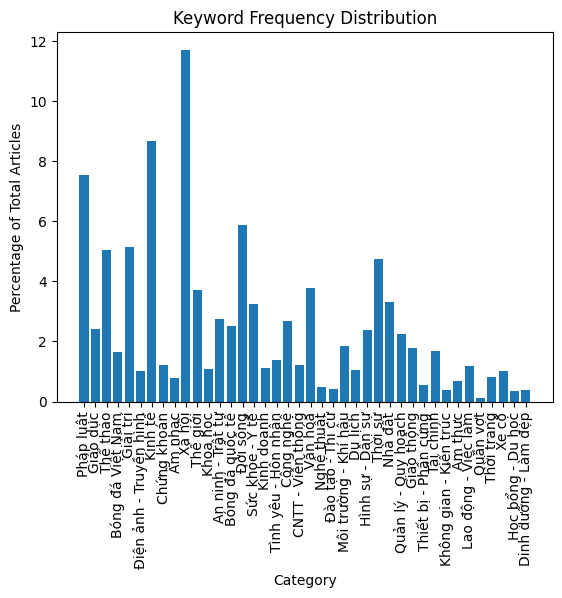

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the total number of articles
total_articles = sum(keyword_count.values())

# Calculate the percentage for each category
percentage_count = {k: (v / total_articles) * 100 for k, v in keyword_count.items()}

# Create a bar chart
plt.bar(percentage_count.keys(), percentage_count.values())
plt.xlabel('Category')
plt.ylabel('Percentage of Total Articles')
plt.title('Keyword Frequency Distribution')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [21]:
with open('/home/tomorrow/primera_folder/translate/news-crawl/Crawlers/result/related_articles.jsonl', 'r') as f:
    related_articles = [json.loads(line) for line in f]

In [ ]:
related_articles[6]

In [68]:
dedup_list = []
count=0
for temp_list in related_articles:
    if len(temp_list) >1:
        for temp in temp_list:
            dedup_list.append({
                'id': count,
                'text': temp['content'],
            })
        count+=1
with open('/home/tomorrow/primera_folder/translate/news-crawl/Crawlers/result/dedup.json', 'w') as f:
    json.dump(dedup_list, f,indent=4,ensure_ascii=False)        

In [69]:
dedup_list= [i for i in dedup_list if i['text']]

In [70]:
dedup_list[23304]

{'id': 1739,
 'text': 'SYM, một thương hiệu xe nổi tiếng đến từ Đài Loan, vừa ra mắt mẫu xe tay ga SYM Tuscany 150 tại Triển lãm xe máy Kuala Lumpur, Malaysia. Với thiết kế đậm chất cổ điển và hiệu suất mạnh mẽ, Tuscany 150 đã thu hút sự chú ý của những người yêu thích xe tay ga phân khúc 150 phân khối.\nVới thiết kế lấy cảm hứng từ phong cách xe tay ga cổ điển của Ý, Tuscany 150 mang đến sự kết hợp hoàn hảo giữa vẻ ngoài đẹp mắt và hiệu suất ổn định.\nĐộng cơ mạnh mẽ của Tuscany 150 là một trong những điểm nổi bật của chiếc xe này. Với động cơ xi-lanh đơn 149,6 cc được trang bị công nghệ EFI, Tuscany 150 mang lại công suất ấn tượng lên đến 14,74 mã lực tại 8.000 vòng/phút và mô-men xoắn cực đại 11,4 Nm tại 5.500 vòng/phút. Hộp số CVT và hệ thống dẫn động dây đai giúp truyền tải công suất một cách mượt mà và linh hoạt.\nSYM Tuscany 150 không chỉ gây ấn tượng bằng sức mạnh động cơ mà còn với những tính năng và trang bị đáng chú ý. Chiếc xe được trang bị bánh xe 12-inch với lốp kích cỡ 1

In [71]:
from datasets import Dataset

# Assuming your data list contains more examples, add them to the list as needed

# Splitting the data into train and test (you can customize the split ratio)
train_data = dedup_list

# Creating a Hugging Face dataset
dataset = Dataset.from_dict({'text': [i['text'] for i in dedup_list],
                             'id': [i['id'] for i in dedup_list]})

# Optionally, you can save the dataset to a file
dataset.save_to_disk('/home/tomorrow/primera_folder/data/baomoi_dedup')

dataset.load_from_disk("/home/tomorrow/primera_folder/data/baomoi_dedup")

Dataset({
    features: ['text', 'id'],
    num_rows: 107149
})

## DEDUP

In [73]:
dedup_data= dataset.load_from_disk("/home/tomorrow/primera_folder/text-dedup/output/simhash/news_dedup")

In [ ]:
dedup_list= [i for i in dedup_data]
dedup_list

In [ ]:
from collections import defaultdict
grouped_data = defaultdict(list)
for example in dedup_list:
    grouped_data[example['id']].append(example)

# Converting the grouped data into a list of dictionaries
grouped_list = [{'id': key, 'text': [item['text'] for item in value]} for key, value in grouped_data.items()]
grouped_list= [i for i in grouped_list if (len(i['text'])>1)]
len(grouped_list),grouped_list

chọn theo chủ đề: 40 triệu bài báo -> 50k 

search: google search: tối ưu: title + sapo + date (chủ động 5-10k)

làm tnao để chọn cái cùng chủ đề: DL based , chatgpt 

In [27]:
res=[]
for id in range(len(title)):
    res.append(
        {'title':title[id],
         'description': sapo[id],
         'content': sapo[id],
         'date': data_publish[id]}
    )

In [35]:
with open('/home/tomorrow/primera_folder/translate/news-crawl/Crawlers/result/articles_baomoi.txt','w',encoding='utf8') as f:
    for temp in res:
        f.write(json.dumps(temp, ensure_ascii=False)+'\n')

In [39]:
from datetime import datetime

def get_tbs(from_date, to_date):
    """
    Helper function to format the tbs parameter.

    :param datetime.date from_date: Python date object.
    :param datetime.date to_date: Python date object.

    :rtype: str
    :return: Dates encoded in tbs format.
    """
    from_date = from_date.strftime('%m/%d/%Y')
    to_date = to_date.strftime('%m/%d/%Y')
    return 'cdr:1,cd_min:%(from_date)s,cd_max:%(to_date)s' % vars()

# Example datetime string
datetime_string = "2023-10-16 21:17:00"
# Converting string to datetime object
date_object = datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S')

# Using the function for the same start and end date
tbs_parameter = get_tbs(date_object, date_object)
tbs_parameter

from datetime import timedelta

def get_tbs_with_month_range(date):
    """
    Formats a single date to a tbs parameter with a range of +-1 month.
    Handles edge cases for January and December.

    :param datetime.date date: Python date object.

    :rtype: str
    :return: Dates encoded in tbs format with a range of +-1 month.
    """
    # Calculate the start and end dates with a range of +-1 month
    year = date.year
    month = date.month

    if month == 1:
        from_date = datetime(year - 1, 12, date.day)
    else:
        from_date = datetime(year, month - 1, date.day)

    if month == 12:
        to_date = datetime(year + 1, 1, date.day)
    else:
        to_date = datetime(year, month + 1, date.day)

    # Format the dates to tbs format
    from_date_str = from_date.strftime('%m/%d/%Y')
    to_date_str = to_date.strftime('%m/%d/%Y')
    return 'cdr:1,cd_min:%s,cd_max:%s' % (from_date_str, to_date_str)

# Example datetime string
datetime_string = "2023-12-16 21:17:00"
# Converting string to datetime object
date_object = datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S')

# Using the function to get tbs parameter with +-1 month range
tbs_parameter_range = get_tbs_with_month_range(date_object)
tbs_parameter_range


'cdr:1,cd_min:11/16/2023,cd_max:01/16/2024'

### LAW

In [1]:
import json
import logging
from openai import OpenAI

In [ ]:
import pandas as pd

df =  pd.read_parquet('/home/tomorrow/primera_folder/Chinese-LLaMA-Alpaca-2/data_llama/raw_law/laws.parquet', engine='pyarrow')
print(df[''])



In [8]:
list_of_lists = df.values.tolist()
len(list_of_lists)

235486

In [13]:
list_of_lists[3]

[268242,
 'Quyết định 03/2012/QĐ-UBND Quy định về quản lý, vận hành, sử dụng và bảo đảm an toàn thông tin trên Mạng truyền số liệu chuyên dùng của các cơ quan Đảng, Nhà nước trên địa bàn tỉnh Bình Dương',
 'ỦY BAN NHÂN DÂN TỈNH BÌNH DƯƠNG\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM Độc lập Tự do Hạnh phúc\nSố: 03/2012/QĐ UBND\nThủ Dầu Một, ngày 12 tháng 01 năm 2012\nQUYẾT ĐỊNH\nBAN HÀNH QUY ĐỊNH VỀ QUẢN LÝ, VẬN HÀNH, SỬ DỤNG VÀ BẢO ĐẢM AN TOÀN THÔNG TIN TRÊN MẠNG TRUYỀN SỐ LIỆU CHUYÊN DÙNG CỦA CÁC CƠ QUAN ĐẢNG, NHÀ NƯỚC TRÊN ĐỊA BÀN TỈNH BÌNH DƯƠNG\nỦY BAN NHÂN DÂN TỈNH\nCăn cứ Luật Tổ chức Hội đồng nhân dân và Ủy ban nhân dân ngày 26 tháng 11 năm 2003;\nCăn cứ Luật Ban hành văn bản quy phạm pháp luật của Hội đồng nhân dân, Ủy ban nhân dân ngày 03 tháng 12 năm 2004;\nCăn cứ Nghị định số 64/2007/NĐ CP ngày 10 tháng 4 năm 2007 của Chính phủ về ứng dụng công nghệ thông tin trong hoạt động của cơ quan nhà nước;\nCăn cứ Thông tư liên tịch số 06/2008/TTLT/BTTTT BCA ngày 28 tháng 11 năm 2008 của liên

In [15]:
import jsonlines
res=[]
for temp in list_of_lists:
    res.append({'title': temp[1],'text': temp[2]})

In [17]:
res[0]

{'title': 'Quyết định 86/QĐ-UBND năm 2012 thành lập Ban Chỉ đạo phòng, chống tội phạm và xây dựng phong trào toàn dân bảo vệ an ninh Tổ quốc do tỉnh Bình Phước ban hành',
 'text': 'ỦY BAN NHÂN DÂN TỈNH BÌNH PHƯỚC\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM Độc lập Tự do Hạnh phúc\nSố: 86/QĐ UBND\nBình Phước, ngày 12 tháng 01 năm 2012\nQUYẾT ĐỊNH\nVỀ VIỆC THÀNH LẬP BAN CHỈ ĐẠO PHÒNG, CHỐNG TỘI PHẠM VÀ XÂY DỰNG PHONG TRÀO TOÀN DÂN BẢO VỆ AN NINH TỔ QUỐC\nCHỦ TỊCH ỦY BAN NHÂN DÂN TỈNH BÌNH PHƯỚC\nCăn cứ Luật Tổ chức HĐND và UBND ngày 26/11/2003;\nCăn cứ Quyết định số 282/QĐ TTg ngày 24/2/2011 của Thủ tướng Chính phủ ban hành Kế hoạch thực hiện Chỉ thị số 48 CT/TW ngày 22/10/2010 của Bộ Chính trị về tăng cường sự lãnh đạo của Đảng đối với công tác phòng, chống tội phạm trong tình hình mới; Quyết định số 165/2008/QĐ TTg ngày 11/12/2008 của Thủ tướng Chính phủ ban hành Kế hoạch triển khai thực hiện Chỉ thị số 21 CT/TW ngày 26/3/2008 của Bộ Chính trị về tiếp tục tăng cường lãnh đạo, chỉ đạo công tác 

In [16]:
with jsonlines.open('output.jsonl', 'w') as writer:
    for id in res[:10]:
        writer.write(id)

In [46]:
with jsonlines.open('output1.jsonl', 'w') as writer:
    for id in res[:5]:
        writer.write(id)

In [41]:
import json 
with open('output1.jsonl', 'r',encoding='utf8') as f:
    data= [json.loads(line) for line in f]